<a href="https://colab.research.google.com/github/mjwer/E-Commerce-Analysis/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matthew Werner
# Canisius College: DAT 512
# Project 2: E-Commerce Analysis<br>

---



---



In [ ]:
# authenticate with the google account used in console
from google.colab import auth
auth.authenticate_user()

In [ ]:
import pandas as pd
project_id = 'formal-air-380023'

# Data Exploration of Products

In [ ]:
sql = '''
SELECT * FROM `bigquery-public-data.thelook_ecommerce.products`
'''

products = pd.io.gbq.read_gbq(sql,project_id=project_id,
                                      index_col='id')

In [ ]:
products.head()

,cost,category,name,brand,retail_price,department,sku,distribution_center_id
id,,,,,,,,
27569,92.652563,Swim,2XU Men's Swimmers Compression Long Sleeve Top,2XU,150.410004,Men,B23C5765E165D83AA924FA8F13C05F25,1
27445,24.719661,Swim,TYR Sport Men's Square Leg Short Swim Suit,TYR,38.990002,Men,2AB7D3B23574C3DEA2BD278AFD0939AB,1
27457,15.897600,Swim,TYR Sport Men's Solid Durafast Jammer Swim Suit,TYR,27.600000,Men,8F831227B0EB6C6D09A0555531365933,1
27466,17.850000,Swim,TYR Sport Men's Swim Short/Resistance Short Sw...,TYR,30.000000,Men,67317D6DCC4CB778AEB9219565F5456B,1
27481,29.408001,Swim,TYR Alliance Team Splice Jammer,TYR,45.950001,Men,213C888198806EF1A0E2BBF2F4855C6C,1


In [ ]:
products.shape

(29120, 8)

If we plan to cut 20% of products, we will be cutting approximately 5,824 products.

In [ ]:
# How many of each item do we have available to sell?
products.category.value_counts().sort_values()

Clothing Sets                      37
Jumpsuits & Rompers               162
Suits                             188
Skirts                            367
Blazers & Jackets                 561
Leggings                          564
Pants & Capris                    613
Socks & Hosiery                   666
Suits & Sport Coats               739
Plus                              758
Maternity                         898
Socks                             905
Dresses                           955
Pants                            1041
Underwear                        1088
Outerwear & Coats                1420
Active                           1432
Accessories                      1559
Sweaters                         1737
Shorts                           1765
Sleep & Lounge                   1771
Swim                             1798
Fashion Hoodies & Sweatshirts    1866
Tops & Tees                      1868
Jeans                            1999
Intimates                        2363
Name: catego

In [ ]:
# What is the cost per category?
products.groupby('category').cost.mean().sort_values(ascending = False)

category
Suits                            70.182811
Outerwear & Coats                64.978458
Clothing Sets                    52.507530
Jeans                            52.414203
Suits & Sport Coats              50.799630
Dresses                          37.930729
Sweaters                         36.087589
Blazers & Jackets                35.111047
Swim                             28.886588
Pants & Capris                   28.871875
Fashion Hoodies & Sweatshirts    27.803022
Pants                            27.462263
Sleep & Lounge                   24.225506
Jumpsuits & Rompers              24.149758
Tops & Tees                      23.140639
Shorts                           22.924157
Maternity                        22.421596
Active                           21.221666
Skirts                           20.863104
Plus                             19.255625
Intimates                        17.922680
Accessories                      17.064546
Leggings                         16.283878
Un

In [ ]:
# What is the average retail price per category?
products.groupby('category').retail_price.mean().sort_values(ascending = False)

category
Outerwear & Coats                146.017091
Suits & Sport Coats              126.555616
Suits                            116.164096
Jeans                             97.853207
Blazers & Jackets                 92.595080
Clothing Sets                     84.844054
Dresses                           84.203278
Sweaters                          75.318981
Pants                             59.814313
Swim                              57.815662
Pants & Capris                    54.705547
Fashion Hoodies & Sweatshirts     53.915595
Skirts                            52.325232
Maternity                         50.799209
Active                            50.621020
Sleep & Lounge                    49.218769
Shorts                            45.769915
Jumpsuits & Rompers               45.422161
Accessories                       42.565317
Tops & Tees                       41.341638
Plus                              38.425330
Intimates                         33.707380
Underwear              

In [ ]:
# Create a new column, "Profit".
products['profit'] = products.retail_price - products.cost

In [ ]:
products.profit.head()

id
27569    57.757441
27445    14.270340
27457    11.702400
27466    12.150000
27481    16.542000
Name: profit, dtype: float64

In [ ]:
# What is the average profit per product category?
products.groupby('category').profit.mean().sort_values(ascending = False)

category
Outerwear & Coats                81.038634
Suits & Sport Coats              75.755986
Blazers & Jackets                57.484034
Dresses                          46.272549
Suits                            45.981285
Jeans                            45.439004
Sweaters                         39.231392
Pants                            32.352051
Clothing Sets                    32.336524
Skirts                           31.462128
Active                           29.399353
Swim                             28.929074
Maternity                        28.377614
Fashion Hoodies & Sweatshirts    26.112573
Pants & Capris                   25.833671
Accessories                      25.500772
Sleep & Lounge                   24.993263
Shorts                           22.845758
Jumpsuits & Rompers              21.272403
Plus                             19.169705
Tops & Tees                      18.201000
Intimates                        15.784701
Underwear                        14.382373
Le

In [ ]:
# What is the most expensive product?
products['retail_price'].max()

999.0

In [ ]:
# What item is the most expensive?
products[products['retail_price'] == products['retail_price'].max()]

,cost,category,name,brand,retail_price,department,sku,distribution_center_id,profit
id,,,,,,,,,
23546,482.516999,Shorts,Alpha Industries Rip Stop Short,Alpha Industries,999.0,Men,C1AA157F9E8516370E3345F226EF62FC,5,516.483001
24447,404.595001,Outerwear & Coats,Darla,Alpha Industries,999.0,Men,1CE5E897CDA6AEB211DFFE8D514F4365,5,594.404999


# Data Exploration of Product Sales

In [ ]:
# Joining order_items and products on their ID's
sql = '''
SELECT * FROM `bigquery-public-data.thelook_ecommerce.order_items` oi
LEFT JOIN `bigquery-public-data.thelook_ecommerce.products` p 
ON oi.product_id = p.id
'''

order_items = pd.io.gbq.read_gbq(sql,project_id=project_id,
                                      index_col='id')

In [ ]:
order_items.head()


,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,id_1,cost,category,name,brand,retail_price,department,sku,distribution_center_id
id,,,,,,,,,,,,,,,,,,,
50969,35094,28254,13606,137521,Shipped,2021-07-21 10:46:58+00:00,2021-07-20 04:02:00+00:00,NaT,NaT,2.5,13606,1.1075,Accessories,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,2.5,Women,4ACBEDBE977480D19B7B682D4878CAE2,3
87165,60084,48474,13606,235155,Shipped,2023-04-02 01:51:01+00:00,2023-04-02 18:09:00+00:00,NaT,NaT,2.5,13606,1.1075,Accessories,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,2.5,Women,4ACBEDBE977480D19B7B682D4878CAE2,3
47448,32694,26305,13606,128000,Complete,2023-01-27 11:19:49+00:00,2023-01-26 23:32:00+00:00,2023-01-30 00:55:00+00:00,NaT,2.5,13606,1.1075,Accessories,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,2.5,Women,4ACBEDBE977480D19B7B682D4878CAE2,3
128831,88851,71563,13606,347943,Complete,2021-08-01 06:29:22+00:00,2021-08-02 01:36:00+00:00,2021-08-04 08:45:00+00:00,NaT,2.5,13606,1.1075,Accessories,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,2.5,Women,4ACBEDBE977480D19B7B682D4878CAE2,3
74967,51711,41729,13606,202142,Processing,2020-12-17 15:28:29+00:00,NaT,NaT,NaT,2.5,13606,1.1075,Accessories,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,2.5,Women,4ACBEDBE977480D19B7B682D4878CAE2,3


In [ ]:
# How many of each item were sold?
order_items.category.value_counts().sort_values()

Clothing Sets                      187
Jumpsuits & Rompers                933
Suits                             1089
Skirts                            2061
Leggings                          3159
Blazers & Jackets                 3172
Pants & Capris                    3506
Socks & Hosiery                   3759
Plus                              4311
Suits & Sport Coats               5025
Maternity                         5117
Dresses                           5367
Socks                             6301
Pants                             7061
Underwear                         7590
Active                            8979
Outerwear & Coats                 9028
Accessories                       9658
Sweaters                         10942
Shorts                           10972
Sleep & Lounge                   11162
Swim                             11376
Tops & Tees                      11762
Fashion Hoodies & Sweatshirts    11781
Jeans                            12654
Intimates                

In [ ]:
# Which category is bringing in the least revenue?
order_items['profit'] = order_items.retail_price - order_items.cost
order_items.groupby('category').profit.sum().sort_values()

category
Clothing Sets                      5842.663447
Jumpsuits & Rompers               19956.566398
Leggings                          34173.953227
Socks & Hosiery                   37357.071641
Suits                             49722.727376
Socks                             51012.329976
Skirts                            65149.201570
Plus                              83410.370550
Pants & Capris                    91399.527533
Underwear                        108379.236566
Maternity                        145229.789958
Blazers & Jackets                183805.775747
Tops & Tees                      214643.371045
Intimates                        215700.675047
Pants                            227928.776372
Dresses                          247784.988306
Accessories                      249303.966802
Shorts                           253453.081128
Active                           263124.854496
Sleep & Lounge                   283562.776823
Fashion Hoodies & Sweatshirts    306812.738971
Swim

In [ ]:
# Which specific product is being purchased the most?
order_items.name.value_counts().sort_values(ascending = False).head()

Wrangler Men's Premium Performance Cowboy Cut Jean    60
True Religion Men's Ricky Straight Jean               41
Puma Men's Socks                                      39
Fruit of the Loom Women's 6-Pack Crew Socks           37
Wrangler Men's Rugged Wear Classic Fit Jean           36
Name: name, dtype: int64

In [ ]:
# Which specific products are being purchased the least?
order_items.name.value_counts().sort_values().head()

Hard Tail A-line skirt (black)              1
Joe's Jeans Men's King Brixton Jean         1
Ripe Maternity Women's Jacob Tunic Dress    1
Nautica Men's Anchor Deck Polo              1
HUGO BOSS Men's 3 Pack Traditional Brief    1
Name: name, dtype: int64

# Data Exploration of Product Web Views

In [ ]:
# Joining id on user_id to find number of web views per product
sql = '''
SELECT * FROM `bigquery-public-data.thelook_ecommerce.events` oi
INNER JOIN `bigquery-public-data.thelook_ecommerce.products` p 
ON oi.user_id = p.id
'''

WebViews = pd.io.gbq.read_gbq(sql,project_id=project_id,
                                      index_col='id')

In [ ]:
# This table contains all products that had a web view.
WebViews.head()

,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,...,event_type,id_1,cost,category,name,brand,retail_price,department,sku,distribution_center_id
id,,,,,,,,,,,,,,,,,,,,,
197871,15294,3,7f19f444-45ba-414f-8943-f80dd4611196,2023-02-10 08:26:45+00:00,33.189.48.36,Bogatynia,Dolnośląskie,59,Chrome,Email,...,cart,15294,5.160000,Plus,K. Bell Socks Women's 6 Pack Heather Animal Socks,K. Bell,10.000000,Women,2EBB6C06BDC16EF37EC965C6B325B5C6,5
28584,2212,6,cb9eaff1-213b-47a5-b526-e8c23f058843,2023-04-15 04:01:30.040335+00:00,43.3.119.75,Bogatynia,Dolnośląskie,59,Chrome,Email,...,cart,2212,20.450881,Fashion Hoodies & Sweatshirts,District Made - Ladies Mini Stripe Full-Zip Ho...,District Made,42.080002,Women,05A70454516ECD9194C293B0E415777F,7
82793,6447,6,bf0dfb1d-2404-4837-adff-549f453a6957,2021-03-28 02:44:10+00:00,148.199.93.73,Bogatynia,Dolnośląskie,59,Safari,Email,...,cart,6447,28.299181,Shorts,Carhartt Women's Original Fit Tomboy Short,Carhartt,55.380001,Women,88CCF9A98E8519B2011DF33952832F2F,3
9113,703,12,690ff11c-0458-43f2-b22d-9d692246e581,2021-09-28 14:14:48+00:00,194.119.190.117,Bogatynia,Dolnośląskie,59,Chrome,Facebook,...,cart,703,6.645600,Tops & Tees,Allegra K Thumb Hole Sleeve Scoop Neck Autumn ...,Allegra K,11.360000,Women,D6C651DDCD97183B2E40BC464231C962,9
94037,7298,4,34c5f4b5-927d-4345-bb90-5778d525fc92,2021-02-02 13:46:40+00:00,211.213.97.104,Bogatynia,Dolnośląskie,59,Chrome,Adwords,...,cart,7298,18.717931,Skirts,BLACK SKIRT MAXI WRAP ANGLED - FITS (ONE SIZE)...,LOTUSTRADERS,45.990002,Women,CC360B61D7EB072C77A4BEDDEBB3C95B,8


In [ ]:
# Web views per category
WebViews.category.value_counts().sort_values().head()

Clothing Sets           510
Jumpsuits & Rompers    1980
Suits                  2200
Skirts                 4714
Leggings               6775
Name: category, dtype: int64

In [ ]:
# Web views by product name
WebViews.name.value_counts().sort_values().head()

EARNEST SEWN DENIM Men's Ramone Truman Jean                           5
Mens Straight Leg Jeans                                               5
Yimei Women's Sexy Panty Briefs Knickers Bikini Lingerie Underwear    5
Augusta Sportswear Hooded Taffeta Flannel Lined Jacket. 3277          5
DKNYC Women's Bonded Lace Pencil Skirt                                5
Name: name, dtype: int64

# Cutting 20% of Products

We are going to be cutting approximately 5,824 products based on our pevious data exploration. 

The most important thing to consider when cutting products is their bottom line. How much revenue is each category bringing in? We want to cut products that are bringing in the least amount of revenue. This could be due to a low average profit margin per item or the item's sales volume. 

Based on the profit margin for each category we will start by cutting "Clothing Sets". This profit margin is significantly lower than the rest, with the next closest category still bringing in 240% as much revenue. 

Clothing Sets consist of 37 different products. This is a small percentage of our total products, but the profits are so low that we will still cut the products within this category.

Jumpsuits & Rompers are the second lowest category in terms of total revenue brought in, and there are 162 products in this category. This will be cut as well. We are now at 199 products cut.


Leggings bring in the next lowest revenue at 34,557. This is almost 5x as much as the "Clothing Sets" category. Let's dive a little deeper into which specific products from this category we should and should not cut.

In [ ]:
# Starting a dataframe of products that have been cut
ProductsCut = products[products['category'] == 'Clothing Sets']

In [ ]:
# See how many products you have cut so far
temp = products[products['category'] == 'Jumpsuits & Rompers']
ProductsCut = ProductsCut.append(temp)
ProductsCut.shape

<ipython-input-152-527ad4c89607>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ProductsCut = ProductsCut.append(temp)


(199, 9)

In [ ]:
# Filter to only look at items ordered from the category, "Leggings"
leggings = order_items[order_items['category'] == 'Leggings']
leggings.head()

,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,id_1,cost,category,name,brand,retail_price,department,sku,distribution_center_id,profit
id,,,,,,,,,,,,,,,,,,,,
81774,56390,45531,6250,220618,Shipped,2023-03-29 09:57:01+00:00,2023-03-31 23:14:00+00:00,NaT,NaT,5.5,6250,3.4155,Leggings,17 Inches Seamless Leggings White,FineBrandShop,5.5,Women,947018640BF36A2BB609D3557A285329,7,2.0845
31259,21602,17345,6250,84391,Complete,2023-01-28 05:28:03+00:00,2023-01-27 12:27:00+00:00,2023-01-30 21:35:00+00:00,NaT,5.5,6250,3.4155,Leggings,17 Inches Seamless Leggings White,FineBrandShop,5.5,Women,947018640BF36A2BB609D3557A285329,7,2.0845
160713,110718,88941,6250,433807,Complete,2022-08-18 07:12:25+00:00,2022-08-15 04:54:00+00:00,2022-08-16 15:41:00+00:00,NaT,5.5,6250,3.4155,Leggings,17 Inches Seamless Leggings White,FineBrandShop,5.5,Women,947018640BF36A2BB609D3557A285329,7,2.0845
162602,111997,89979,6250,438899,Complete,2021-12-11 14:55:49+00:00,2021-12-13 16:16:00+00:00,2021-12-18 02:15:00+00:00,NaT,5.5,6250,3.4155,Leggings,17 Inches Seamless Leggings White,FineBrandShop,5.5,Women,947018640BF36A2BB609D3557A285329,7,2.0845
149543,103076,82922,6250,403871,Returned,2021-03-04 22:22:40+00:00,2021-03-07 04:01:00+00:00,2021-03-11 19:59:00+00:00,2021-03-12 11:32:00+00:00,5.5,6250,3.4155,Leggings,17 Inches Seamless Leggings White,FineBrandShop,5.5,Women,947018640BF36A2BB609D3557A285329,7,2.0845


In [ ]:
# Which brands are selling the most number of leggings?
pd.set_option("display.max_rows", None)
leggings.brand.value_counts().sort_values(ascending = False).head(15)

Allegra K           253
SK Hat shop         178
Anna-Kaci           177
LeggingsQueen       161
Yelete              141
Stella Elyse        122
FineBrandShop       119
Soho Girls           98
Luxury Divas         83
boxed-gifts          80
Icon                 51
HUE                  49
Hard Tail            46
Nollia               43
American Apparel     40
Name: brand, dtype: int64

In [ ]:
# Create list of top 8 brands
# 8 is where the dropoff is for this category.
top8Brands = ['Allegra K', 'SK Hat shop', 'LeggingsQueen', 'Anna-Kaci', 'FineBrandShop', 'Yelete', 'Stella Elyse', 'Soho Girls']

In [ ]:
# How many products are we left with to cut after excluding all leggings products from the top 8 brands?
cut = products[products['category'] == 'Leggings']
cutting = cut[~cut['brand'].isin(top8Brands)]
cutting.shape

(329, 9)

In [ ]:
# Running tally of the number of products we have cut already
ProductsCut = ProductsCut.append(cutting)
ProductsCut.shape

<ipython-input-157-def553d076f0>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ProductsCut = ProductsCut.append(cutting)


(528, 9)

There is a significant drop off in sales after the top 8 legging brands. Let's keep these 8 brands in stock so that our customers are not upset, but we will cut the other products. We are able to cut 329 products. We have now cut a total of 528 products.

Next we'll look at cutting products from the "Socks and Hosiery" category. We want to see if there is a major dropoff in sales by brand in order to cut the correct portion of this category.

In [ ]:
# Filter to only look at items ordered from the category, "Socks & Hosiery" 
socksHosiery = order_items[order_items['category'] == 'Socks & Hosiery']
socksHosiery.head()

,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,id_1,cost,category,name,brand,retail_price,department,sku,distribution_center_id,profit
id,,,,,,,,,,,,,,,,,,,,
51397,35393,28496,9002,138682,Shipped,2022-09-21 15:45:37+00:00,2022-09-22 13:30:00+00:00,NaT,NaT,5.0,9002,2.235,Socks & Hosiery,LRG Hensler Crew Sock,LRG,5.0,Women,F3957FA3BEA9138B3F54F0E18975A30C,2,2.765
70835,48837,39390,9002,191022,Shipped,2022-01-18 16:35:43+00:00,2022-01-18 19:20:00+00:00,NaT,NaT,5.0,9002,2.235,Socks & Hosiery,LRG Hensler Crew Sock,LRG,5.0,Women,F3957FA3BEA9138B3F54F0E18975A30C,2,2.765
103900,71708,57875,9002,280429,Shipped,2022-06-26 06:08:07+00:00,2022-06-29 01:46:00+00:00,NaT,NaT,5.0,9002,2.235,Socks & Hosiery,LRG Hensler Crew Sock,LRG,5.0,Women,F3957FA3BEA9138B3F54F0E18975A30C,2,2.765
124700,86007,69278,9002,336801,Shipped,2023-03-17 15:33:42+00:00,2023-03-13 17:02:00+00:00,NaT,NaT,5.0,9002,2.235,Socks & Hosiery,LRG Hensler Crew Sock,LRG,5.0,Women,F3957FA3BEA9138B3F54F0E18975A30C,2,2.765
24284,16812,13427,9002,65494,Complete,2023-03-23 06:52:52+00:00,2023-03-24 03:01:00+00:00,2023-03-24 05:26:00+00:00,NaT,5.0,9002,2.235,Socks & Hosiery,LRG Hensler Crew Sock,LRG,5.0,Women,F3957FA3BEA9138B3F54F0E18975A30C,2,2.765


In [ ]:
# Which brands are selling the most number of "Socks & Hosiery"?
socksHosiery.brand.value_counts().sort_values(ascending = False).head(15)

HUE               280
Hanes             181
Sock It To Me     142
SK Hat shop       141
SmartWool         128
K. Bell           114
Betsey Johnson    112
Gold Toe          103
Berkshire         103
Angelina           92
Foot Traffic       92
Luxury Divas       62
Nine West          60
Snoozies           56
Anne Klein         55
Name: brand, dtype: int64

In [ ]:
# How many products do we have in the "Socks & Hosiery" category?
sockHosProd = products[products['category'] == 'Socks & Hosiery']
sockHosProd.shape

(666, 9)

In [ ]:
# Create list of top 7 brands
# There is a dropoff after the 7th highest selling brand for this category
top7Brands = ['HUE', 'Hanes', 'Sock It To Me', 'SK Hat shop', 'SmartWool', 'Gold Toe', 'K. Bell']

In [ ]:
# How many products are we left with to cut after excluding all "Socks & Hosiery" products from the top 7 brands?
cut = products[products['category'] == 'Socks & Hosiery']
cutting = cut[~cut['brand'].isin(top7Brands)]
cutting.shape

(471, 9)

In [ ]:
# Running tally of the number of products we have cut already
ProductsCut = ProductsCut.append(cutting)
ProductsCut.shape

<ipython-input-163-def553d076f0>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ProductsCut = ProductsCut.append(cutting)


(999, 9)

Out of the 666 products under the category "Socks & Hosiery", 471 of them are not amoung the top 7 selling brands. We will cut this 471 which brings us to 999 products cut so far.

In order to avoid cutting the same product twice, we will skip the category, "socks". We do not want to cut the same product twice.

Next up we have the category suits. We want to see if there is a major dropoff in sales by brand in order to cut the correct portion of this category.

In [ ]:
# Filter to only look at items ordered from the category, "Suits"
suits = order_items[order_items['category'] == 'Suits']
suits.head()

,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,id_1,cost,category,name,brand,retail_price,department,sku,distribution_center_id,profit
id,,,,,,,,,,,,,,,,,,,,
45633,31446,25310,8116,123137,Shipped,2023-02-23 03:35:53+00:00,2023-02-24 23:36:00+00:00,NaT,NaT,54.0,8116,30.294,Suits,Danny & Nicole Women's Bolero Jacket Dress,Danny & Nicole,54.0,Women,8F6242793017047D373F29F270388BA9,9,23.706
139836,96428,77625,8116,377647,Shipped,2021-08-10 06:29:46+00:00,2021-08-09 18:00:00+00:00,NaT,NaT,54.0,8116,30.294,Suits,Danny & Nicole Women's Bolero Jacket Dress,Danny & Nicole,54.0,Women,8F6242793017047D373F29F270388BA9,9,23.706
168277,115904,93245,8116,454160,Shipped,2022-11-02 11:35:08+00:00,2022-11-05 04:31:00+00:00,NaT,NaT,54.0,8116,30.294,Suits,Danny & Nicole Women's Bolero Jacket Dress,Danny & Nicole,54.0,Women,8F6242793017047D373F29F270388BA9,9,23.706
102520,70731,57062,8116,276647,Returned,2022-12-31 07:00:38+00:00,2022-12-31 09:56:00+00:00,2022-12-31 10:22:00+00:00,2023-01-03 04:31:00+00:00,54.0,8116,30.294,Suits,Danny & Nicole Women's Bolero Jacket Dress,Danny & Nicole,54.0,Women,8F6242793017047D373F29F270388BA9,9,23.706
140226,96702,77838,8116,378729,Returned,2023-04-18 10:48:36.089332+00:00,2023-04-18 22:06:19.089332+00:00,2023-04-19 02:22:19.089332+00:00,2023-04-20 18:27:19.089332+00:00,54.0,8116,30.294,Suits,Danny & Nicole Women's Bolero Jacket Dress,Danny & Nicole,54.0,Women,8F6242793017047D373F29F270388BA9,9,23.706


In [ ]:
# Which brands are selling the most number of "Suits"?
# More importantly, which are selling the least?
suits.brand.value_counts().sort_values(ascending = False)

Evan Picone         200
Kasper              181
Ice                 152
Tahari              134
Le Suit             121
Suit Studio          80
Nine West            70
Anne Klein           37
Lesuit               23
Roamans              23
Danny & Nicole       23
Jones New York       15
LabelShopper          7
Jessica London        7
Sutton Studio         6
Allegra K             6
The Best Dressed      2
Jessica Howard        2
Name: brand, dtype: int64

In [ ]:
# Create list of top 5 brands
# There is a dropoff after the 5th highest selling brand for this category
top5Brands = ['Evan Picone', 'Kasper', 'Ice', 'Tahari', 'Le Suit']

In [ ]:
# How many products are we left with to cut after excluding all "Suits" products from the top 7 brands?
cut = products[products['category'] == 'Suits']
cutting = cut[~cut['brand'].isin(top5Brands)]
cutting.shape

(51, 9)

In [ ]:
# Running tally of the number of products we have cut already
ProductsCut = ProductsCut.append(cutting)
ProductsCut.shape

<ipython-input-168-def553d076f0>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ProductsCut = ProductsCut.append(cutting)


(1050, 9)

We can cut another 51 products from the 'Suits and Sport Coats' category. We are now up to 1050 products cut while still keeping our top brands from each category so far. 

Next, we have the "Plus" category. We will ignore this category because it directly targets a segment of the population that could bring us some issues if we decide to cut anything from this department.

Instead, we will go on to the next category with the lowest revenue brought in. This category is "Pants and Capris. We once again will be seeing if there is a major dropoff in sales by brand in order to cut the correct portion of this category.

In [ ]:
# Filter to only look at products ordered from the category, "Pants & Capris"
pantsCapris = order_items[order_items['category'] == 'Pants & Capris']
pantsCapris.head()

,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,id_1,cost,category,name,brand,retail_price,department,sku,distribution_center_id,profit
id,,,,,,,,,,,,,,,,,,,,
104693,72251,58309,5411,282511,Shipped,2023-02-26 11:18:14+00:00,2023-02-27 17:59:00+00:00,NaT,NaT,14.0,5411,6.888,Pants & Capris,Democracy Women's Crop Rope Tie Detail Pant,Democracy,14.0,Women,3BC71FAEBE42E1639EB6FDED38D714CD,2,7.112
92172,63567,51324,5411,248658,Returned,2021-08-26 10:55:21+00:00,2021-08-27 18:14:00+00:00,2021-08-28 23:42:00+00:00,2021-08-31 14:16:00+00:00,14.0,5411,6.888,Pants & Capris,Democracy Women's Crop Rope Tie Detail Pant,Democracy,14.0,Women,3BC71FAEBE42E1639EB6FDED38D714CD,2,7.112
2506,1736,1358,5212,6772,Shipped,2022-02-07 05:58:20+00:00,2022-02-06 14:44:00+00:00,NaT,NaT,15.0,5212,7.665,Pants & Capris,BENNETT MALIBU Atila Linen Wide-Leg Pants [BM-...,BENNETT MALIBU,15.0,Women,C5D215777C229704A7862DE577D40A73,2,7.335
33053,22820,18367,5662,89260,Shipped,2022-06-29 13:15:35+00:00,2022-06-30 19:57:00+00:00,NaT,NaT,15.0,5662,8.265,Pants & Capris,FINESSE Stretch City Pant W/ Crease [SP-916] Grey,FINESSE,15.0,Women,887CAADC3642E304EDE659B734F79B00,1,6.735
75087,51786,41788,5212,202482,Shipped,2022-02-04 00:06:08+00:00,2022-02-02 08:07:00+00:00,NaT,NaT,15.0,5212,7.665,Pants & Capris,BENNETT MALIBU Atila Linen Wide-Leg Pants [BM-...,BENNETT MALIBU,15.0,Women,C5D215777C229704A7862DE577D40A73,2,7.335


In [ ]:
# Which brands are selling the most number of "Pants & Capris"?
pantsCapris.brand.value_counts().sort_values(ascending = False).head(15)

Jones New York    214
Allegra K         172
Alfred Dunner     144
Woman Within      104
Dockers           104
MANGO              96
LOTUSTRADERS       81
Anne Klein         76
Lee                71
Calvin Klein       70
Briggs             68
Rafaella           65
Eddie Bauer        64
Pendleton          53
Sag Harbor         53
Name: brand, dtype: int64

In [ ]:
# Create list of top 3 brands
# There is a dropoff after the 3rd highest selling brand for this category
top3Brands = ['Jones New York', 'Allegra K', 'Alfred Dunner']

In [ ]:
# How many products are we left with to cut after excluding all "Pants & Capris" products from the top 3 brands?
cut = products[products['category'] == 'Pants & Capris']
cutting = cut[~cut['brand'].isin(top3Brands)]
cutting.shape

(515, 9)

In [ ]:
# Running tally of the number of products we have cut already
ProductsCut = ProductsCut.append(cutting)
ProductsCut.shape

<ipython-input-173-def553d076f0>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ProductsCut = ProductsCut.append(cutting)


(1565, 9)

We are able to cut 515 products from this category which is great. This is because we have a lot of products in this category and the profit from this category is relatively low. We have now cut a total of 1565 products. We are going to need to make an even bigger cut here at some point.

We will next focus on the category underwear.

In [ ]:
# Filter to only look at products ordered from the category, "Underwear"
underwear = order_items[order_items['category'] == 'Underwear']
underwear.head()

,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,id_1,cost,category,name,brand,retail_price,department,sku,distribution_center_id,profit
id,,,,,,,,,,,,,,,,,,,,
28426,19637,15744,25558,76765,Shipped,2022-02-02 11:39:36+00:00,2022-02-02 13:59:00+00:00,NaT,NaT,7.0,25558,3.29,Underwear,Short Sleeve Mock Neck T-Shirt,Jockey,7.0,Men,7D571EF48D7C44EC949687E28ABCDF30,10,3.71
38738,26714,21526,25558,104582,Complete,2022-08-07 09:25:21+00:00,2022-08-09 20:34:00+00:00,2022-08-14 00:08:00+00:00,NaT,7.0,25558,3.29,Underwear,Short Sleeve Mock Neck T-Shirt,Jockey,7.0,Men,7D571EF48D7C44EC949687E28ABCDF30,10,3.71
104449,72082,58159,25558,281846,Processing,2023-02-05 02:39:47+00:00,NaT,NaT,NaT,7.0,25558,3.29,Underwear,Short Sleeve Mock Neck T-Shirt,Jockey,7.0,Men,7D571EF48D7C44EC949687E28ABCDF30,10,3.71
171737,118299,95178,25558,463559,Processing,2022-05-18 14:29:38+00:00,NaT,NaT,NaT,7.0,25558,3.29,Underwear,Short Sleeve Mock Neck T-Shirt,Jockey,7.0,Men,7D571EF48D7C44EC949687E28ABCDF30,10,3.71
65719,45319,36484,26169,177293,Shipped,2023-04-13 21:57:10.636617+00:00,2023-04-14 15:17:40.636617+00:00,NaT,NaT,10.0,26169,4.52,Underwear,Men's Elephant Thong by Donna Di Capri,Donna Di Capri,10.0,Men,4B8CDF66647DF5B1D9549039ECA7819E,4,5.48


In [ ]:
# Which brands are selling the most number of "Underwear"?
underwear.brand.value_counts().sort_values(ascending = False).head(15)

Calvin Klein         704
Hanes                637
Fruit of the Loom    426
Jockey               369
Diesel               342
2(x)ist              318
HUGO BOSS            281
Duofold              279
C-IN2                249
Emporio Armani       184
Tommy Hilfiger       165
Papi                 150
Ed Hardy             148
Underworks           129
Dockers              124
Name: brand, dtype: int64

In [ ]:
# Create list of top 2 brands
# There is a relatively high dropoff after the 2nd highest selling brand for this category
top2Brands = ['Calvin Klein', 'Hanes']

In [ ]:
# How many products are we left with to cut after excluding all "Socks & Hosiery" products from the top 7 brands?
cut = products[products['category'] == 'Underwear']
cutting = cut[~cut['brand'].isin(top2Brands)]
cutting.shape

(898, 9)

In [ ]:
# Running tally of the number of products we have cut already
ProductsCut = ProductsCut.append(cutting)
ProductsCut.shape

<ipython-input-178-def553d076f0>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ProductsCut = ProductsCut.append(cutting)


(2463, 9)

We can cut 898 products from the Underwear category.

This brings our total to 2463.

We are going to skip the category "Maternity" because once again this targets a specif group of people and we do not want to cut the number of thier products and go somewhere else where they have more options. Additionally, maternity only has 898 products. 

Intimates, however, has 2363 products (which is the most out of any category) and does not have a high revenue value (14th highest). Let's move to intimates next.

In [ ]:
# Filter to only look at products ordered from the category, "Intimates"
intimates = order_items[order_items['category'] == 'Intimates']
intimates.head()

,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,id_1,cost,category,name,brand,retail_price,department,sku,distribution_center_id,profit
id,,,,,,,,,,,,,,,,,,,,
73308,50542,40764,12602,197703,Shipped,2019-11-01 23:21:22+00:00,2019-11-04 06:28:00+00:00,NaT,NaT,3.75,12602,2.1375,Intimates,BASIC INVISIBLE CLEAR BRA STRAP BY DESIGNSK,DesignSK,3.75,Women,FD8979ADA2FD5BAB05E9C5F035A5C4C7,1,1.6125
154731,106621,85721,12602,417835,Complete,2019-12-06 14:17:08+00:00,2019-12-03 21:53:00+00:00,2019-12-06 00:27:00+00:00,NaT,3.75,12602,2.1375,Intimates,BASIC INVISIBLE CLEAR BRA STRAP BY DESIGNSK,DesignSK,3.75,Women,FD8979ADA2FD5BAB05E9C5F035A5C4C7,1,1.6125
167946,115680,93062,12602,453281,Complete,2023-03-21 02:53:46+00:00,2023-03-22 19:43:00+00:00,2023-03-23 10:21:00+00:00,NaT,3.75,12602,2.1375,Intimates,BASIC INVISIBLE CLEAR BRA STRAP BY DESIGNSK,DesignSK,3.75,Women,FD8979ADA2FD5BAB05E9C5F035A5C4C7,1,1.6125
153408,105717,85024,12602,414273,Returned,2023-01-18 17:09:20+00:00,2023-01-19 04:45:00+00:00,2023-01-21 20:22:00+00:00,2023-01-23 01:08:00+00:00,3.75,12602,2.1375,Intimates,BASIC INVISIBLE CLEAR BRA STRAP BY DESIGNSK,DesignSK,3.75,Women,FD8979ADA2FD5BAB05E9C5F035A5C4C7,1,1.6125
34552,23841,19192,12602,93325,Processing,2020-08-07 05:53:44+00:00,NaT,NaT,NaT,3.75,12602,2.1375,Intimates,BASIC INVISIBLE CLEAR BRA STRAP BY DESIGNSK,DesignSK,3.75,Women,FD8979ADA2FD5BAB05E9C5F035A5C4C7,1,1.6125


In [ ]:
# Which brands are selling the most number of "Intimates"?
intimates.brand.value_counts().sort_values(ascending = False).head(15)

Bali                        419
Hanes                       379
Maidenform                  370
Laura                       359
Wacoal                      297
SEX NIGHT                   286
Ilusion                     279
Vanity Fair                 277
Calvin Klein                238
Barely There                236
Flexees                     229
Frederick's of Hollywood    221
Bslingerie                  211
Fruit of the Loom           208
Fashion Forms               199
Name: brand, dtype: int64

In [ ]:
# Create list of top 12 brands
# There is a relatively high dropoff after the 12th highest selling brand for this category
top12Brands = ['Laura', 'Vanity Fair', 'Wacoal', 'Ilusion', 'SEX NIGHT', 'Calvin Klein', "Frederick's of Hollywood", 
              'Flexees', 'Barely There', 'Bslingerie', 'Fashion Forms', 'Cosabella']

In [ ]:
# How many products are we left with to cut after excluding all "Socks & Hosiery" products from the top 7 brands?
cut = products[products['category'] == 'Underwear']
cutting = cut[~cut['brand'].isin(top12Brands)]
cutting.shape

(992, 9)

In [ ]:
# Running tally of the number of products we have cut already
ProductsCut = ProductsCut.append(cutting)
ProductsCut.shape

<ipython-input-183-def553d076f0>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ProductsCut = ProductsCut.append(cutting)


(3455, 9)

We can cut 992 products from this category. We are now up to 3455 products that we have cut so far.

Next, we are going to go on to "Tops & Tees". This category has the 3rd highest number of products, and is only the 13th highest in terms of revenue value. This is a good ratio relative to the other categories.

In [ ]:
# Filter to only look at products ordered from the category, "Tops & Tees"
topsTees = order_items[order_items['category'] == 'Tops & Tees']
topsTees.head()

,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,id_1,cost,category,name,brand,retail_price,department,sku,distribution_center_id,profit
id,,,,,,,,,,,,,,,,,,,,
12385,8568,6871,16949,33370,Shipped,2023-02-14 16:57:38+00:00,2023-02-15 02:32:00+00:00,NaT,NaT,5.0,16949,2.57,Tops & Tees,Seinfeld Happy Festivus For the Rest of Us Lig...,Seinfeld,5.0,Men,2485D846DC142C8056986D6B551F5486,7,2.43
84853,58520,47237,16949,228925,Shipped,2023-03-07 03:43:15+00:00,2023-03-08 02:26:00+00:00,NaT,NaT,5.0,16949,2.57,Tops & Tees,Seinfeld Happy Festivus For the Rest of Us Lig...,Seinfeld,5.0,Men,2485D846DC142C8056986D6B551F5486,7,2.43
111022,76553,61716,16949,299748,Shipped,2021-10-21 15:03:43+00:00,2021-10-21 21:46:00+00:00,NaT,NaT,5.0,16949,2.57,Tops & Tees,Seinfeld Happy Festivus For the Rest of Us Lig...,Seinfeld,5.0,Men,2485D846DC142C8056986D6B551F5486,7,2.43
123679,85292,68707,16949,334042,Shipped,2021-05-05 14:32:12+00:00,2021-05-05 06:34:00+00:00,NaT,NaT,5.0,16949,2.57,Tops & Tees,Seinfeld Happy Festivus For the Rest of Us Lig...,Seinfeld,5.0,Men,2485D846DC142C8056986D6B551F5486,7,2.43
140549,96913,78005,16949,379616,Shipped,2022-05-21 03:58:18+00:00,2022-05-22 07:00:00+00:00,NaT,NaT,5.0,16949,2.57,Tops & Tees,Seinfeld Happy Festivus For the Rest of Us Lig...,Seinfeld,5.0,Men,2485D846DC142C8056986D6B551F5486,7,2.43


In [ ]:
# Which brands are selling the most number of "Tops & Tees"?
topsTees.brand.value_counts().sort_values(ascending = False).head(15)

Allegra K             545
Carhartt              414
Volcom                307
Patty                 256
U.S. Polo Assn.       253
Van Heusen            244
Harley-Davidson       227
Hurley                209
DC                    206
Tommy Hilfiger        204
Lucky Brand           192
Ralph Lauren          186
Columbia              183
Hanes                 155
Calvin Klein Jeans    147
Name: brand, dtype: int64

In [ ]:
# Create list of top 12 brands
# There is a dropoff after the 12th highest selling brand for this category
# This is not the biggest dropoff, but we do not want to cut too many at this point.
top12BrandsTT = ['Allegra K', 'Carhartt', 'Volcom', 'Van Heusen', 'Patty', 'Harley-Davidson', 
                'Tommy Hilfiger', 'U.S. Polo Assn.', 'Lucky Brand', 'DC', 'Hurley', 'Columbia']


In [ ]:
# How many products are we left with to cut after excluding all "Socks & Hosiery" products from the top 7 brands?
cut = products[products['category'] == 'Tops & Tees']
cutting = cut[~cut['brand'].isin(top12BrandsTT)]
cutting.shape

(1352, 9)

In [ ]:
# Running tally of the number of products we have cut already
ProductsCut = ProductsCut.append(cutting)
ProductsCut.shape

<ipython-input-188-def553d076f0>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ProductsCut = ProductsCut.append(cutting)


(4807, 9)

We can cut 1352 products from the Tops & Tees category. We are now up to 4807 products that we have cut. We have 1017 products left to cut.

Next we will move on to accessories. 

In [ ]:
# Filter to only look at products ordered from the category, "Accessories"
accessories = order_items[order_items['category'] == 'Accessories']
accessories.head()

,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,id_1,cost,category,name,brand,retail_price,department,sku,distribution_center_id,profit
id,,,,,,,,,,,,,,,,,,,,
50969,35094,28254,13606,137521,Shipped,2021-07-21 10:46:58+00:00,2021-07-20 04:02:00+00:00,NaT,NaT,2.5,13606,1.1075,Accessories,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,2.5,Women,4ACBEDBE977480D19B7B682D4878CAE2,3,1.3925
87165,60084,48474,13606,235155,Shipped,2023-04-02 01:51:01+00:00,2023-04-02 18:09:00+00:00,NaT,NaT,2.5,13606,1.1075,Accessories,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,2.5,Women,4ACBEDBE977480D19B7B682D4878CAE2,3,1.3925
47448,32694,26305,13606,128000,Complete,2023-01-27 11:19:49+00:00,2023-01-26 23:32:00+00:00,2023-01-30 00:55:00+00:00,NaT,2.5,13606,1.1075,Accessories,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,2.5,Women,4ACBEDBE977480D19B7B682D4878CAE2,3,1.3925
128831,88851,71563,13606,347943,Complete,2021-08-01 06:29:22+00:00,2021-08-02 01:36:00+00:00,2021-08-04 08:45:00+00:00,NaT,2.5,13606,1.1075,Accessories,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,2.5,Women,4ACBEDBE977480D19B7B682D4878CAE2,3,1.3925
74967,51711,41729,13606,202142,Processing,2020-12-17 15:28:29+00:00,NaT,NaT,NaT,2.5,13606,1.1075,Accessories,Elegant PASHMINA SCARF WRAP SHAWL STOLE,Scarf_tradinginc,2.5,Women,4ACBEDBE977480D19B7B682D4878CAE2,3,1.3925


In [ ]:
# Which brands are selling the most number of "Accessories"?
accessories.brand.value_counts().sort_values(ascending = False).head(15)

Ray-Ban                  617
Oakley                   431
Carhartt                 285
TrendsBlue               223
Isotoner                 208
TheTieBar                194
boxed-gifts              153
Outdoor Research         131
Kenneth Cole REACTION    127
Columbia                 119
Kangol                   103
WARMEN                   102
Luxury Divas             100
Carrera                   99
Levi's                    98
Name: brand, dtype: int64

In [ ]:
# Create list of top brands
# There is a dropoff after the 2nd highest selling brand for this category, but...
# We will keep products for more brands in this category so that we do not drop too many products.
topAccessoriesBrands = ['Ray-Ban', 'Oakley', 'Carhartt', 'Isotoner', 'TrendsBlue', 'TheTieBar', 'boxed-gifts',
                        'Outdoor Research', 'Columbia', 'Kenneth Cole REACTION', 'Luxury Divas', "Levi's", 'Kangol',
                        'WARMEN', 'Harley-Davidson', 'TUMI', 'Tommy Hilfiger', 'HOBO', 'DG Eyewear']


In [ ]:
# How many products are we left with to cut after excluding all "Accessories" products from the top 19 brands?
cut = products[products['category'] == 'Accessories']
cutting = cut[~cut['brand'].isin(topAccessoriesBrands)]
cutting.shape

(1024, 9)

In [ ]:
# Running tally of the number of products we have cut already
ProductsCut = ProductsCut.append(cutting)
ProductsCut.shape

<ipython-input-193-def553d076f0>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ProductsCut = ProductsCut.append(cutting)


(5831, 9)

We have officially cut 5,831 products which is 20.024% of our original product total.

In [ ]:
# Final list of products we have cut
NameOfProductsCut = ProductsCut['name']
NameOfProductsCut.head()

id
8037    Jostar Short Sleeve Solid Stretchy Capri Pants...
8036    Womens Top Stitch Jacket and Pant Set by City ...
8035    Ulla Popken Plus Size 3-Piece Duster and Pants...
8039        Ulla Popken Plus Size Floral 3-Piece Pant Set
8051    Women's Embroidered Career Set by BBW Boutique...
Name: name, dtype: object

# Part 2

### User Purchases

In [ ]:
# Pulling info on how many times people ordered a certain number of items
sql = '''
SELECT 
  user_id,
  count(*) order_count 
FROM `bigquery-public-data.thelook_ecommerce.orders` 
where status not in ('Returned','Cancelled')
group by 1
'''

user_order_count = pd.io.gbq.read_gbq(sql,project_id=project_id,
                                      index_col='user_id')

In [ ]:
# Number of users with either 1, 2, 3, or 4 purchases
user_order_count.value_counts()

order_count
1              45948
2              14276
3               4229
4               1549
dtype: int64

In [ ]:
# One hot encoding
user_orders = pd.get_dummies(user_order_count['order_count'],prefix='orders')

### User Product Purchase History

In [ ]:
# How many times each user purchased a certain category
sql = '''
SELECT
  user_id,
  p.category,
  COUNT(*) purchase_count
FROM
  `bigquery-public-data.thelook_ecommerce.order_items` oi
JOIN
  `bigquery-public-data.thelook_ecommerce.products` p
ON
  oi.product_id = p.id
WHERE
  status NOT IN ('Returned','Cancelled')
GROUP BY 1,2
'''

user_purchase_by_category = pd.io.gbq.read_gbq(sql,project_id=project_id,
                                      index_col='user_id')

In [ ]:
# Previewing the data
user_purchase_by_category.head()

,category,purchase_count
user_id,,
23751,Clothing Sets,1
38858,Clothing Sets,1
55032,Clothing Sets,1
66986,Clothing Sets,1
61487,Clothing Sets,1


In [ ]:
# One hot encoding
user_categories = pd.get_dummies(user_purchase_by_category['category'],prefix='cat').groupby('user_id').max()

### User Demographics

In [ ]:
# Selecting all user data
sql = '''
SELECT
  *
FROM
  `bigquery-public-data.thelook_ecommerce.users`
'''

user_demo = pd.io.gbq.read_gbq(sql,project_id=project_id,
                                      index_col='id')

In [ ]:
# Previewing the data
user_demo.head()

,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
id,,,,,,,,,,,,,,
3192,Regina,Conner,reginaconner@example.com,17,F,Acre,0857 Arnold Way Suite 617,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2019-11-09 12:09:00+00:00
4916,Kevin,Smith,kevinsmith@example.net,29,M,Acre,716 Antonio Dale,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-02-07 02:04:00+00:00
6455,Laurie,Lara,laurielara@example.net,34,F,Acre,7449 Flores Loaf,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Organic,2020-04-26 05:23:00+00:00
31241,Bobby,Graham,bobbygraham@example.com,13,M,Acre,8016 Holder Points,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2021-10-30 02:44:00+00:00
34270,Rodney,Martinez,rodneymartinez@example.com,33,M,Acre,844 Kerry Village Apt. 091,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Organic,2019-07-06 17:00:00+00:00


In [ ]:
# One hot encoding
user_country = pd.get_dummies(user_demo['country'],prefix='country')

In [ ]:
# One hot encoding
user_gender = pd.get_dummies(user_demo['gender'],prefix='sex')

In [ ]:
# One hot encoding
user_age = pd.get_dummies(pd.qcut(user_demo['age'], q = 5, labels = range(5)),prefix='age')

In [ ]:
# One hot encoding
user_traffic = pd.get_dummies(user_demo['traffic_source'],prefix='traffic')

### Web Traffic

In [ ]:
# Get a count of each event and total number of events per user
sql = '''
SELECT
  user_id,
  SUM(CASE WHEN event_type = 'purchase' THEN 1 ELSE 0 END) num_purchase,
  SUM(CASE WHEN event_type = 'cart' THEN 1 ELSE 0 END) num_cart,
  SUM(CASE WHEN event_type = 'product' THEN 1 ELSE 0 END) num_product,
  COUNT(*) all_events
FROM
  `bigquery-public-data.thelook_ecommerce.events`
WHERE
  user_id IS NOT NULL
GROUP BY
  1
'''

user_web = pd.io.gbq.read_gbq(sql,project_id=project_id,
                                      index_col='user_id')

In [ ]:
# Previewing the data
user_web.head()

,num_purchase,num_cart,num_product,all_events
user_id,,,,
14657,7,15,15,54
81207,7,13,13,47
57384,7,21,21,71
53715,7,19,19,67
5823,9,25,25,85


In [ ]:
# Get a count of how many events per purchase
user_web['event_per_purchase'] = round(user_web['all_events']/user_web['num_purchase'])
user_web['event_per_purchase'].value_counts().sort_index()

5.0     47672
6.0      8939
7.0     11400
8.0      1332
9.0      1952
10.0     3837
11.0     1940
12.0      132
13.0     2577
Name: event_per_purchase, dtype: Int64

In [ ]:
# One hot encoding
user_events_per_purchase = pd.get_dummies(pd.qcut(user_web['event_per_purchase'],q=4,labels=range(2),duplicates='drop'),prefix='events_per_purchase')

In [ ]:
# Get a count of average cart sizes
user_web['avg_cart_size'] = round(user_web['num_cart']/user_web['num_purchase'])
user_web['avg_cart_size'].value_counts()

1.0    49007
2.0    21692
3.0     6373
4.0     2709
Name: avg_cart_size, dtype: Int64

In [ ]:
# One hot encoding
user_avg_cart_size = pd.get_dummies((user_web['avg_cart_size']),prefix = 'avg_cart_size')

### Combine Data

In [ ]:
# Creating a list of dataframes
dfs = [user_orders,
       user_categories,
       user_country,
       user_gender,
       user_age,
       user_traffic,
       user_events_per_purchase,
       user_avg_cart_size]
for df in dfs:
  print(df.shape)

(66002, 4)
(66002, 26)
(100000, 15)
(100000, 2)
(100000, 5)
(100000, 5)
(79781, 2)
(79781, 4)


In [ ]:
# Joining all data
user_all = user_country.join(user_categories,how='left').\
join(user_orders,how='left').\
join(user_gender).join(user_age).join(user_traffic).\
join(user_events_per_purchase,how='left').\
join(user_avg_cart_size,how='left')

In [ ]:
# shape of new dataframe
user_all.shape

(100000, 63)

In [ ]:
# means of new dataframe
user_all.mean().head()

country_Australia    0.02210
country_Austria      0.00001
country_Belgium      0.01248
country_Brasil       0.14608
country_China        0.33830
dtype: float64

In [ ]:
# Removing NAs
user_all.dropna(inplace=True)

In [ ]:
# New dataframe's shape
user_all.shape

(66002, 63)

### Determine Optimal Number of Clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

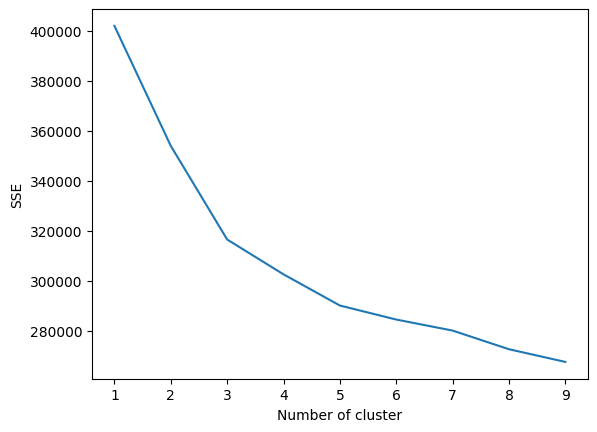

In [ ]:
# Lets find the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(user_all)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
# The breaking point seems to be either 3 or 5. Lets go with 3.
kmeans = KMeans(n_clusters=3, max_iter=1000).fit(user_all)
user_all["clusters"] = kmeans.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Examine Cluster Characteristics

In [ ]:
# Means for each cluster
cluster_means = user_all.groupby('clusters').mean()

In [ ]:
# Display means
cluster_means

,country_Australia,country_Austria,country_Belgium,country_Brasil,country_China,country_Colombia,country_España,country_France,country_Germany,country_Japan,...,traffic_Email,traffic_Facebook,traffic_Organic,traffic_Search,events_per_purchase_0,events_per_purchase_1,avg_cart_size_1.0,avg_cart_size_2.0,avg_cart_size_3.0,avg_cart_size_4.0
clusters,,,,,,,,,,,,,,,,,,,,,
0,0.021192,0.00000,0.013198,0.146078,0.345324,0.000075,0.00000,0.045551,0.042685,0.024811,...,0.050830,0.060558,0.152413,0.697738,0.610106,0.389894,0.000000,0.711840,0.212066,0.076094
1,0.022786,0.00000,0.013208,0.148208,0.337148,0.000101,0.00005,0.049151,0.040833,0.026214,...,0.047941,0.062056,0.150174,0.698291,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,0.022215,0.00003,0.012673,0.145996,0.340070,0.000304,0.00003,0.047500,0.041787,0.023431,...,0.047956,0.061875,0.151922,0.696308,0.846102,0.153898,0.601124,0.283209,0.084972,0.030694


In [ ]:
# Display means as list
user_all.mean().head()

country_Australia    0.022181
country_Austria      0.000015
country_Belgium      0.012939
country_Brasil       0.146677
country_China        0.340247
dtype: float64

In [ ]:
# Finding the percent difference between the cluster means and all means
percent_diff = cluster_means/user_all.mean()-1
percent_diff = percent_diff.T

In [ ]:
# Show values to help us label each group
print(percent_diff.to_string())

clusters                                  0         1         2
age_0                              0.006448 -0.004049 -0.000157
age_1                             -0.004348 -0.014704  0.010616
age_2                             -0.005013  0.005684 -0.001407
age_3                              0.033757  0.011123 -0.020309
age_4                             -0.033870  0.002256  0.012289
avg_cart_size_1.0                 -1.000000  0.666002  0.001475
avg_cart_size_2.0                  1.504684 -1.000000 -0.003498
avg_cart_size_3.0                  1.495864 -1.000000  0.000056
avg_cart_size_4.0                  1.487531 -1.000000  0.003414
cat_Accessories                    0.269320 -0.408098  0.137494
cat_Active                         0.354912 -0.444518  0.124959
cat_Blazers & Jackets              1.983055  0.333200 -1.000000
cat_Clothing Sets                  2.020844  0.307940 -1.000000
cat_Dresses                        1.909676  0.382250 -1.000000
cat_Fashion Hoodies & Sweatshirts  0.304

### Define Pseudonymes

In [ ]:
# Decide what to call these based on the data above
cluster_names = {0:'Females who love to shop.',
                 1:'Spanish females buying one thing at a time.',
                 2:'Columbian men who purchase necessities.'
                 }

In [ ]:
# Replace each user with their pseudonym
user_all['clusters'].replace(cluster_names).head(10)

id
3192     Spanish females buying one thing at a time.
4916         Columbian men who purchase necessities.
6455     Spanish females buying one thing at a time.
31241        Columbian men who purchase necessities.
34270        Columbian men who purchase necessities.
39869    Spanish females buying one thing at a time.
70535    Spanish females buying one thing at a time.
84792                      Females who love to shop.
97265        Columbian men who purchase necessities.
98024        Columbian men who purchase necessities.
Name: clusters, dtype: object